<a href="https://colab.research.google.com/github/pksaraiii/12300402/blob/main/final12300402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# """Housing Price Prediction Project"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import xgboost as xgb

In [ ]:
# ------------------ 1) LOAD DATASET ------------------
data = pd.read_csv('Housing.csv')
print(data.head())
data.info()
data.describe()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.shape

(20640, 10)

In [ ]:
# ------------------ 2) DATA CLEANING ------------------
# data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


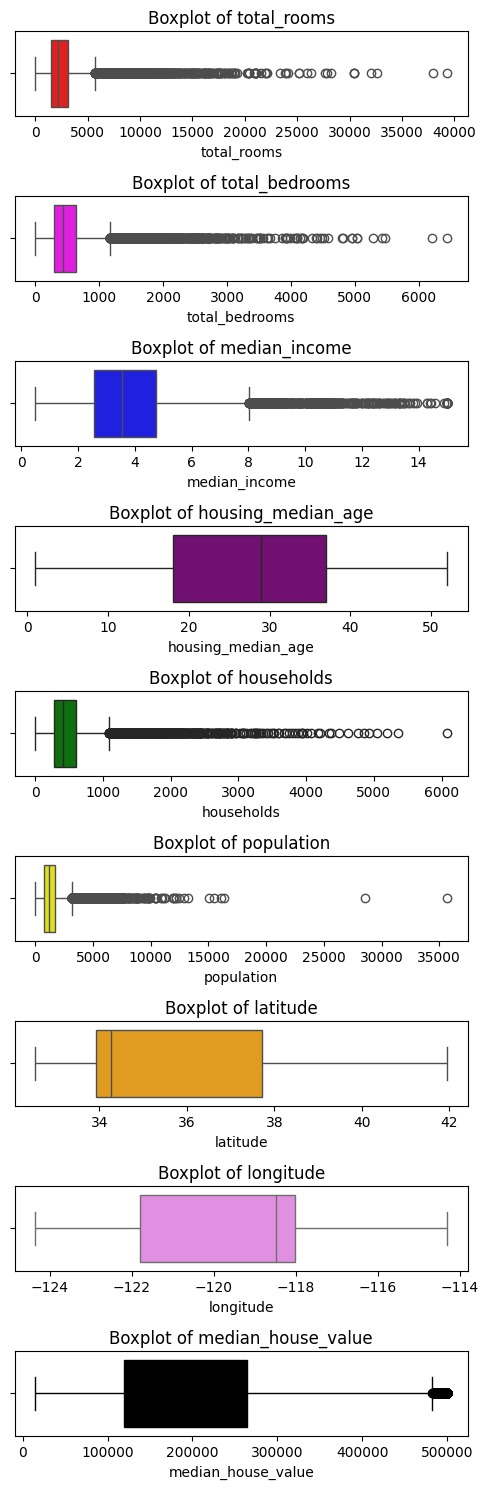

In [ ]:
# ------------------ 3) EXPLORATORY DATA ANALYSIS ------------------
num_cols = ['total_rooms','total_bedrooms','median_income','housing_median_age',
            'households','population','latitude','longitude','median_house_value']

fig, axs = plt.subplots(len(num_cols), 1, figsize=(5,15))
colors = ['red','magenta','blue','purple','green','yellow','orange','violet','black']
for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], color=colors[i % len(colors)], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


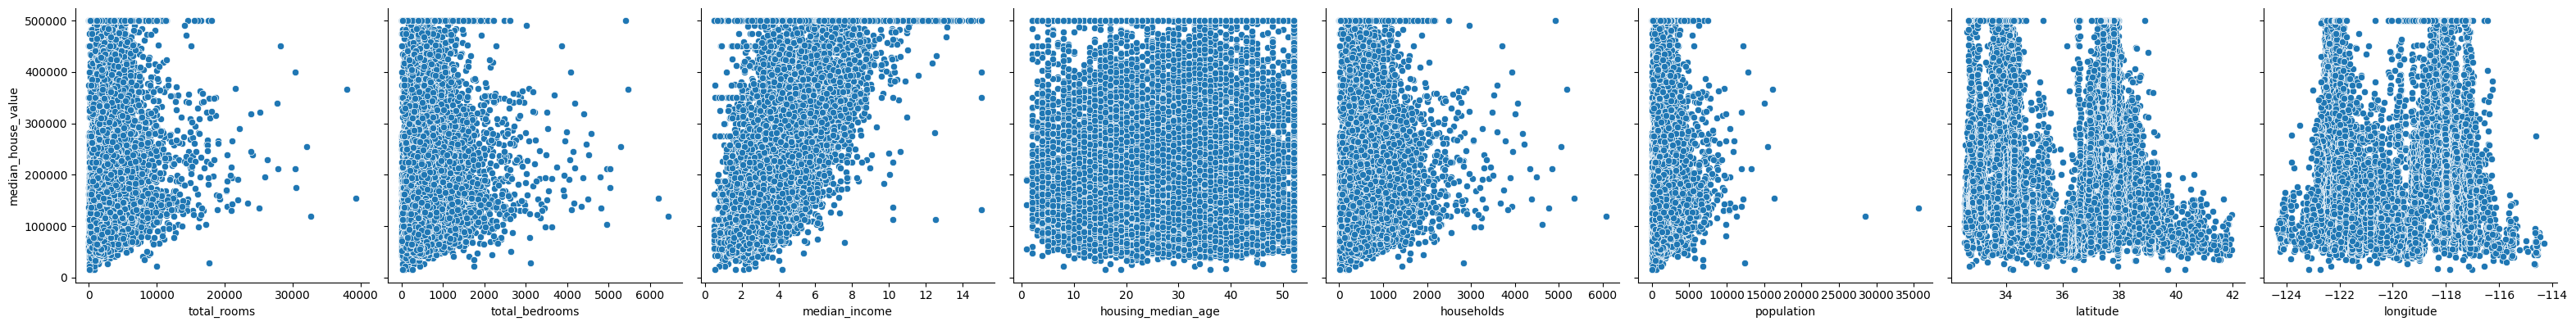

In [ ]:
# Pairplot for features vs target
x_vars = ['total_rooms','total_bedrooms','median_income','housing_median_age',
          'households','population','latitude','longitude']
y_var = 'median_house_value'
sns.pairplot(data, x_vars=x_vars, y_vars=y_var, kind='scatter', height=4, aspect=1)
plt.show()

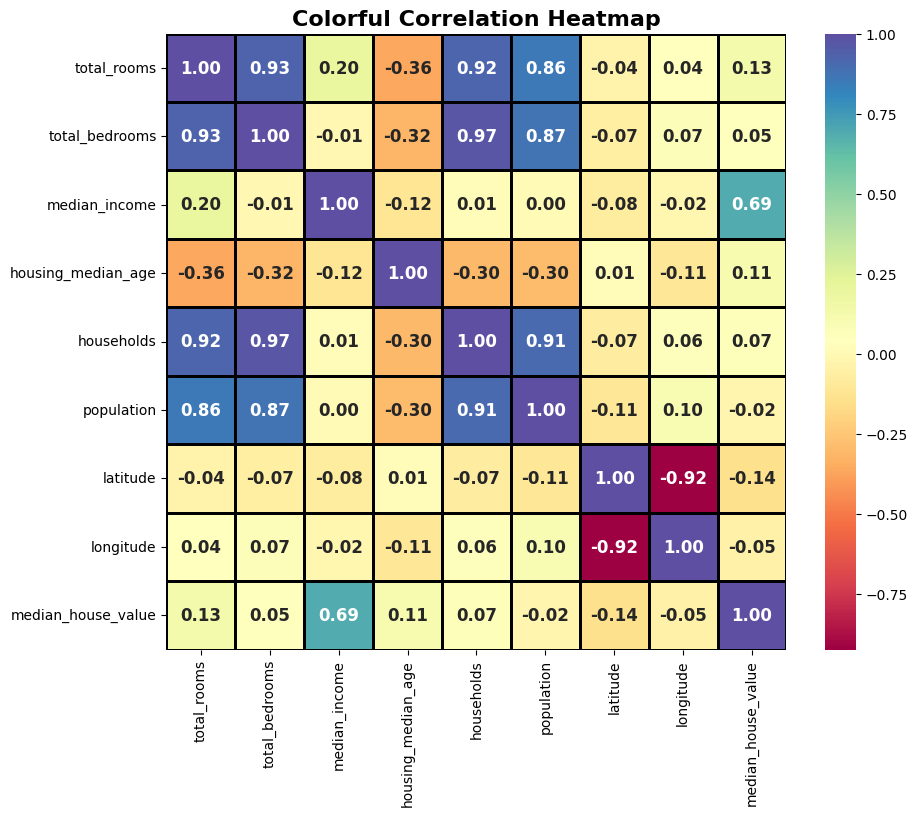

In [ ]:
# Colorful correlation heatmap
plt.figure(figsize=(10,8))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Spectral', linewidths=1,
            linecolor='black', annot_kws={'size':12,'weight':'bold'})
plt.title('Colorful Correlation Heatmap', fontsize=16, weight='bold')
plt.show()

In [ ]:
# ------------------ 4) FEATURE SELECTION ------------------
X = data[x_vars]
y = data[y_var]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ------------------ 5) LINEAR REGRESSION ------------------
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R² Score: 0.6302202709084433
Linear Regression MSE: 4803822688.623728


In [ ]:
# ------------------ 6) RANDOM FOREST REGRESSION ------------------
model_rf = RandomForestRegressor(n_estimators=100, random_state=50)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R² Score: 0.8135557396689732
Random Forest MSE: 2422104559.7664332


In [ ]:
# ------------------ 7) XGBOOST REGRESSION ------------------
model_xgb = xgb.XGBRegressor(n_estimators=300, learning_rate=0.08, max_depth=6, random_state=50)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost R² Score: 0.8299083642136821
XGBoost MSE: 2209666985.1070395


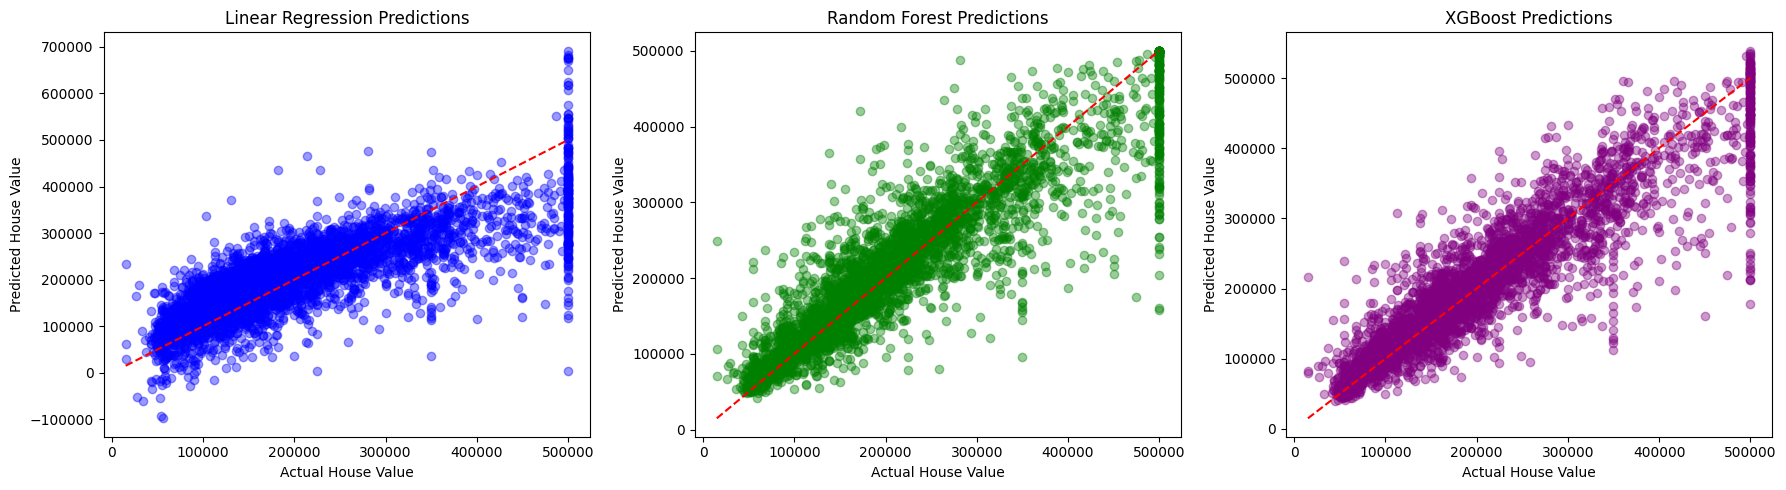

In [ ]:
# ------------------ 8) REGRESSION PLOTS ------------------
plt.figure(figsize=(18,5))

# Linear Regression
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lr, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Linear Regression Predictions')

# Random Forest
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Random Forest Predictions')

# XGBoost
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('XGBoost Predictions')

plt.tight_layout()
plt.show()

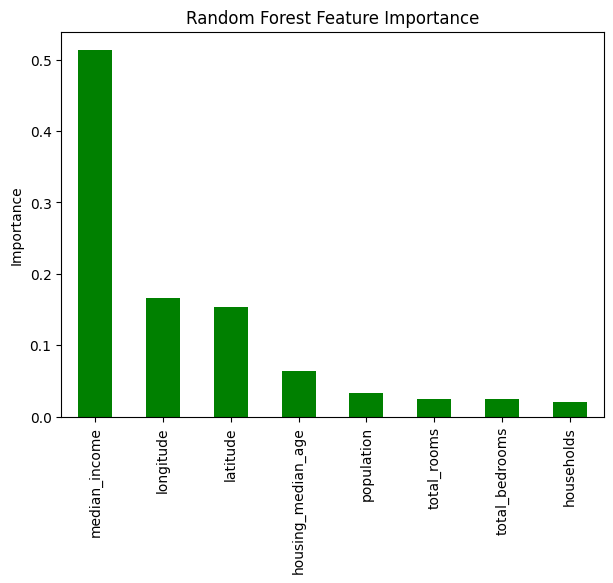

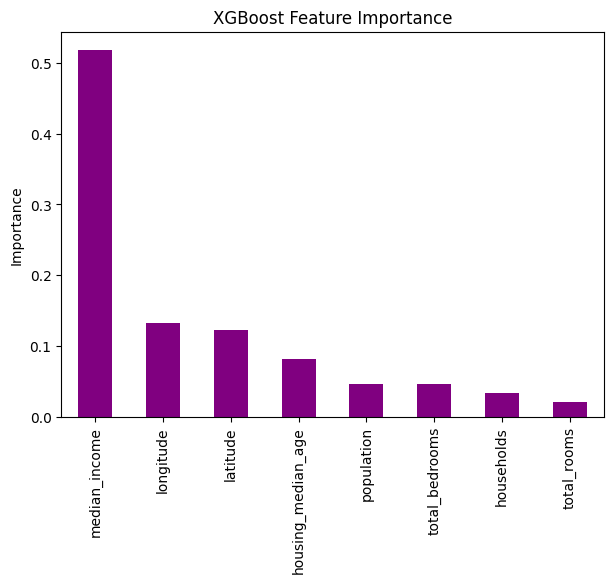

In [ ]:
# ------------------ 9) FEATURE IMPORTANCE ------------------
# Random Forest Feature Importance
rf_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(7,5))
rf_importances.plot(kind='bar', color='green')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.show()

# XGBoost Feature Importance
xgb_importances = pd.Series(model_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(7,5))
xgb_importances.plot(kind='bar', color='purple')
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.show()

In [ ]:
# ------------------ 10) SAVE CLEANED DATA AND MODELS ------------------
data.to_csv('housing_cleaned.csv', index=False)
joblib.dump(model_lr, 'linear_regression_model.pkl')
joblib.dump(model_rf, 'random_forest_model.pkl')
joblib.dump(model_xgb, 'xgboost_model.pkl')
print('Cleaned data and trained models saved successfully!')


Cleaned data and trained models saved successfully!


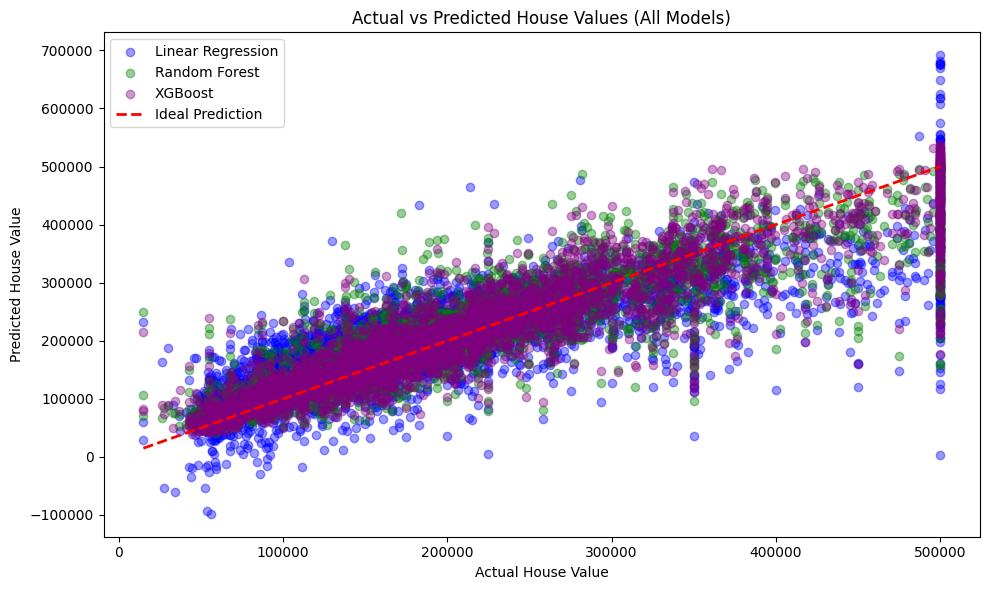

In [ ]:
# ------------------ 11) COMBINED REGRESSION PLOT ------------------
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred_lr, alpha=0.4, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='purple', label='XGBoost')

# Plot ideal prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Prediction')

plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values (All Models)')
plt.legend()
plt.tight_layout()
plt.show()
